In [3]:
import pandas as pd

In [5]:
df= pd.read_excel("C:/Users/Florencia Cires/OneDrive/Documentos/Maximo/Datos limpios.xlsx")
df.head()



,AÑO,TOTAL,ORO,DIVISAS,total base monetaria,Billetes poder del publico,billetes bancos,base monetaria,Tipo de cambio,Prestamos bancarios % PBI
0,1917,604.8,306.5,298.27,0.000101,0.000047,0.000054,0.000105,2.278200e-13,25.732992
1,1918,703.5,366.8,336.68,0.000115,0.000050,0.000066,0.000119,2.240000e-13,25.971463
2,1919,735.3,376.1,359.19,0.000118,0.000057,0.000061,0.000121,2.300500e-13,28.173071
3,1920,839.2,455.8,383.43,0.000136,0.000051,0.000085,0.000141,2.541100e-13,27.101211
4,1921,824.9,453.8,371.07,0.000136,0.000047,0.000090,0.000141,3.143000e-13,29.696410


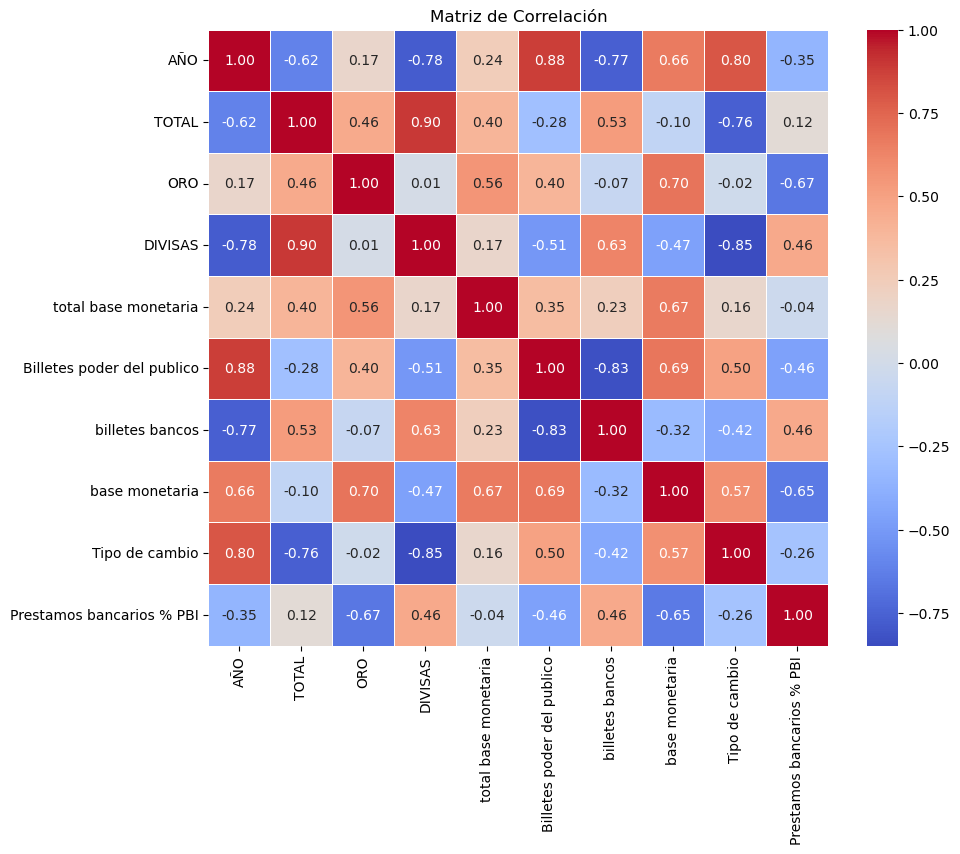

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [19]:
df.columns

Index(['AÑO', 'TOTAL', 'ORO', 'DIVISAS', 'total base monetaria',
       'Billetes poder del publico', 'billetes bancos', 'base monetaria',
       'Tipo de cambio', 'Prestamos bancarios % PBI', 'ORO_DIVISAS_TOTAL'],
      dtype='object')

In [32]:
# Crear una nueva variable combinando TOTAL, ORO y DIVISAS
df['ORO_DIVISAS_TOTAL'] = df['ORO'] + df['DIVISAS'] 

# Eliminar las variables originales
df_reduced = df.drop(columns=['ORO', 'DIVISAS', 'TOTAL'])


In [34]:
df_reduced

,AÑO,total base monetaria,Billetes poder del publico,billetes bancos,base monetaria,Tipo de cambio,Prestamos bancarios % PBI,ORO_DIVISAS_TOTAL
0,1917,0.000101,0.000047,0.000054,0.000105,2.278200e-13,25.732992,604.77
1,1918,0.000115,0.000050,0.000066,0.000119,2.240000e-13,25.971463,703.48
2,1919,0.000118,0.000057,0.000061,0.000121,2.300500e-13,28.173071,735.29
3,1920,0.000136,0.000051,0.000085,0.000141,2.541100e-13,27.101211,839.23
4,1921,0.000136,0.000047,0.000090,0.000141,3.143000e-13,29.696410,824.87
5,1922,0.000136,0.000051,0.000085,0.000141,2.774500e-13,33.157343,823.03
6,1923,0.000136,0.000064,0.000072,0.000141,2.904500e-13,32.374728,805.00
7,1924,0.000132,0.000069,0.000063,0.000136,2.922300e-13,28.856357,766.16
8,1925,0.000132,0.000066,0.000066,0.000136,2.486600e-13,29.303705,776.32
9,1926,0.000132,0.000078,0.000054,0.000136,2.468200e-13,30.830142,776.40


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF nuevamente
vif_data = pd.DataFrame()
vif_data["Variable"] = df_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(df_reduced.values, i) for i in range(len(df_reduced.columns))]
print(vif_data)


                     Variable           VIF
0                         AÑO  2.658373e+02
1        total base monetaria  2.809303e+06
2  Billetes poder del publico  9.454295e+05
3             billetes bancos  5.641529e+05
4              base monetaria  1.118705e+03
5              Tipo de cambio  2.070272e+02
6   Prestamos bancarios % PBI  1.426628e+02
7           ORO_DIVISAS_TOTAL  4.648259e+01


In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Definir variables dependiente e independientes
X = df_reduced[["ORO_DIVISAS_TOTAL", 'total base monetaria', 'Billetes poder del publico', 
        'billetes bancos', 'base monetaria', 'Prestamos bancarios % PBI']]
y = df_reduced['Tipo de cambio']
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = ridge_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (Ridge): {mse:.4f}")


Error cuadrático medio (Ridge): 0.0000


In [42]:
import statsmodels.api as sm
# Añadir constante para la regresión (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:         Tipo de cambio   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     20.87
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           9.88e-07
Time:                        10:14:50   Log-Likelihood:                 691.24
No. Observations:                  23   AIC:                            -1368.
Df Residuals:                      16   BIC:                            -1361.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               